In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
pd.set_option('display.max_columns', None)

#Import data
LT_simple_data = pd.read_csv("C:\Users\jsilverberg\Desktop\Data Science\Hegarty Data\Sloan root.txt",sep=None,engine='python')
LT_data = pd.read_csv(r"C:\Users\jsilverberg\Desktop\Data Science\Hegarty Data\tbl_ee.txt",sep=None,engine='python')
P_data = pd.read_csv(r"C:\Users\jsilverberg\Desktop\Data Science\Hegarty Data\tbl_loan_pay.txt",sep=None,engine='python')




In [3]:
LT_data.head()

,app_partner_nm,app_dcsn_cd,acct_dcsn_cd,app_product_nm,app_prod_request_nm,app_prod_class_nm,app_prod_risk_nr,app_joint_in,app_dealer_nm,app_status_cd,acct_stat_cd,anl_year_nr,anl_month_nr,period_wk_cd,anl_prior12_in,anl_today_in,app_recent_in,app_recent_cd,app_dt,app_period_dt,acct_period_dt,acct_fund_dt,acct_co_dt,app_td_reason_cd,app_decline_cd,app_td_type_cd,app_td_cpc_cd,anl_slr_strat_cd,app_mob_nr,acct_mob_nr,dlnq_mob_nr,dlnq_chgoff_mob_nr,dlnq_ebad_mob_nr,application_id,kwf_acct_id,addr_prop_city_nm,addr_prop_state_cd,addr_prop_zip5_nr,kwf_pool_cd,kwf_risk_cd,anl_fico_rt_cd,anl_cofico_rt_cd,anl_fico20_rt_cd,anl_fico50_rt_cd,anl_capFICO_rt_cd,anl_dlnqFICO_rt_cd,anl_fico_cpf_rt_cd,anl_slr_FICO_cd,anl_FC4_ppa_cd,app_tier_cd,app_ss14_tier_cd,anl_strat650_in,anl_strat680_in,anl_strat700_in,anl_strat720_in,scrFICO,scrFICO_J,scrFC4,scrSS14,anl_inc_band_cd,anl_DTI_cd,anl_DMI_cd,anl_fc_cd,anl_bk_cd,anl_coll_size_cd,anl_rev_rt_cd,anl_late_cd,anl_rct_late_cd,anl_mtlate_cd,anl_employ_cd,anl_ln_term_cd,anl_ln_size_cd,anl_ln_rate_cd,anl_mort_size_cd,anl_debt_size_cd,anl_mort_pay_cd,anl_utl_cd,stip_rsn_in,app_stip_rsn_cd,app_stip_rsn_nm,stip_rsn_cd,stip_rsn_nm,stip_voi_in,stip_vom_in,stip_line_in,app_except_in,anl_upsize_in,dlnq_status_nr,dlnq_fpay_dflt_in,dlnq_2pay_dflt_in,acct_pay_cd,addr_fund_days_cd,anl_CITIFICO_rt_cd,anl_ln_CITIterm_cd,anl_ln_CITIsize_cd,app_atrisk_in,BOR_ALERT,BOR_ALERT_ADDR,active_quote_in,acct_dcsn_dt,acct_approve_dt,acct_decline_dt,acct_pend_dt,acct_cancel_dt,acct_except_dt,first_acct_cac_dt,first_orig_acct_cac_dt,acct_cac_dt,orig_acct_cac_dt,acct_ic_dt,acct_sc_dt,acct_fc_dt,app_price_id,acct_pay_bal_nr,cpf_nossn_in,last_dt,last_fund_dt,dlnq_co_dt,acct_chgoff_dt,apps_nr,app_nr,approve_nr,auto_approve_nr,pend_nr,decline_nr,except_nr,fund_nr,dlnq_everbad_nr,dlnq_chgoff_nr,dlnq_co_nr,app_odds_bad_nr,apv_odds_bad_nr,acct_odds_bad_nr,app_loan_am,approve_am,approve_auto_am,app_line_am,acct_loan_am,app_atrisk_am,acct_bal_am,acct_pay_ltd_am,dlnq_everbad_am,dlnq_ltd_chgoff_am,dlnq_lv_chgoff_am,dlnq_sor_am,dlnq_fpay_chgoff_am,loan_apr_am,acct_orig_dlr_am,anl_loss_fc_am,anl_loss_ltd_am,anl_loss_prj_am,anl_days_rt,sumFICO_am,acct_actv_pay_bal_am,acct_no_pay_bal_am,anl_aim_in,kwf_app_id,app_channel_nm,acct_sales_nm,scrFICO_high,dlnq_chgoff_in,sla_dl_cac_days,sla_dl_sc1_days,sla_dl_sc2_days,sla_dl_fc_days,sla_dl_all_days,orig_date,app_first_dt,app_last_dt,acct_loan_dt,acct_pif_dt,dlnq_times030_nr,dlnq_times060_nr,dlnq_times090_nr,dlnq_times120_nr,dlnq_times150_nr,dlnq_times180_nr,dlnq_times210_nr,dlnq_curr_days_nr,dlnq_ever30_in,dlnq_ltd_allco_am,acct_pay_made_nr,acct_fund_in,lv_acct_stat_cd,fico_cd,app_crd_tier_cd,fni_dcsn_cd,exp_dcsn_cd,app_apr_rt,app_disc_rt,app_term_nr,acct_inv_cd,app_fund_days_cd,app_fund_days_nr,app_cac_dt,app_sc_dt,app_fc_dt,pool_group,acct_orig_inv_cd,addr_prop_id,acct_orig_pay_am,acct_orig_loan_term_nr,acct_orig_loan_rt,acct_orig_dlr_rt
0,VIEWTECH,A,NaN,EELOAN,NaN,WINDOW DOOR,3,0,STORM TIGHT WINDOWS INC,Good App,Quit,2013,6,2013_26,3,0,0,*,06/24/2013,06/01/2013,NaN,NaN,NaN,Approved,DTI Decline > 62,Approved,Approved,Approved,42,NaN,NaN,NaN,NaN,30000000001206,NaN,BOCA RATON,FL,33428,NaN,KW3.1,720-779,NoHit,740-759,700-749,740+,720+,720-749,720-779,band625,B,A,1,1,1,1,748.0,NaN,627.0,NaN,12k,63%+,lt $750,None,None,None,lt40,None,None,None,Missing,121m - 144m,$15k - $20k,None,None,$15k,1000,10% - 20%,0,NaN,NaN,Approved,Approved,0,0,0,0,0,NaN,0,0,0_NA,Quit 210+,740-759,121m+,17500,1,NaN,NaN,0.0,24JUN2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,06/24/2013,NaN,NaN,NaN,1,1,1,1,0,0,0,0,0,0,0,0.080214,0.080214,0.0,17775,17775,17775,0,0,17775,0,0,0,0,0,0,0,NaN,NaN,341.297941,953.552712,612.254771,1.0,NaN,0,17775,0,51844,SAMI,NaN,748.0,0,60.0,0.0,0.0,120.0,120.0,NaN,06/24/2013,06/24/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,740-759,B,A,NaN,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NOT_FUNDED,NaN,3033428000000058,NaN,NaN,NaN,NaN
1,VIEWTECH,A,NaN,EELOAN,NaN,REMODEL,9,0,FLORIDA HOM

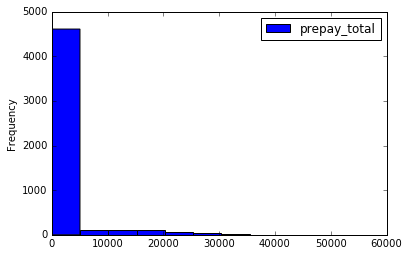

In [13]:
#P_data.groupby('loan_number').sum()
df = P_data[['loan_number', 'prepay_total']]
df.groupby('loan_number').sum().plot(kind='hist',use_index=True,y='prepay_total')

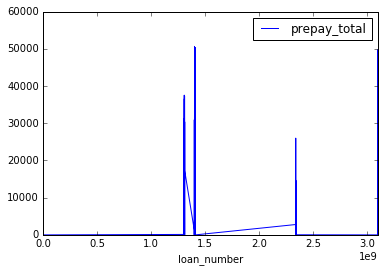

In [14]:
#Enumerate our P_data 
P_data.sort('period_dt',inplace=True)
P_data['period'] = P_data.groupby('loan_number').cumcount()

C:\Users\jsilverberg\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


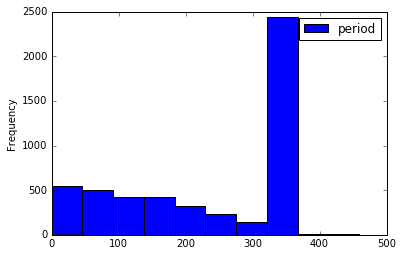

In [15]:
#P_data.groupby('loan_number').sum()
df = P_data[['loan_number', 'prepay_total','period']]
df.groupby('loan_number').max().plot(kind='hist',use_index=True,y='period')

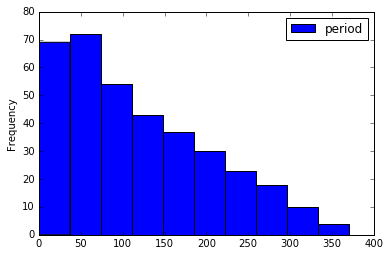

In [16]:
df2 = df[df['prepay_total']>5000]
df2.groupby('loan_number').max().plot(kind='hist',use_index=True,y='period')


In [19]:
df2.describe()

,loan_number,prepay_total,period
count,3.710000e+02,371.000000,371.000000
mean,1.759459e+09,16913.883073,118.436658
std,7.565625e+08,7147.703955,86.098769
min,1.302250e+09,5044.040000,0.000000
25%,1.308170e+09,11348.595000,46.500000
50%,1.311060e+09,16342.670000,93.000000
75%,1.409640e+09,20663.990000,174.000000
max,3.100028e+09,50667.960000,371.000000


In [34]:
P_data['loan_amount_calc'] = P_data['loan_amount'] * (1-P_data['discount_pct'])
df = P_data[['loan_number','prepay_total','loan_amount_calc']]
df2 = df.groupby('loan_number').max()
df2.head()
df2['prepay_perc'] = df2['prepay_total'] / df2['loan_amount_calc']
df2.describe()
#P_data['prepay_perc'] = P_data[]

,prepay_total,loan_amount_calc,prepay_perc
count,5036.000000,5036.000000,5036.000000
mean,1323.784799,23017.445178,0.062058
std,4797.187778,8251.485017,0.212795
min,0.000000,7211.795520,0.000000
25%,0.000000,16884.875000,0.000000
50%,0.000000,21698.589500,0.000000
75%,104.270000,28048.500000,0.005782
max,50667.960000,55000.000000,1.166616


In [194]:
def prepay(c):
  if c['prepay_perc'] >= 0.2:
    return 1
  elif c['prepay_perc'] < 0.2:
    return 0
df2['prepay_perc'] = df2['prepay_total'] / df2['loan_amount_calc']
df2['prepay_binary'] = df2.apply(prepay, axis=1)
df2.head()



,prepay_total,loan_amount_calc,prepay_perc,prepay_binary
loan_number,,,,
1748588,0.00,37883.00,0.000000,0
1758282,0.00,14602.56,0.000000,0
1302110018,122.25,14776.00,0.008274,0
1302110020,0.93,26600.00,0.000035,0
1302110040,0.00,19841.00,0.000000,0


In [198]:
df.head()
logit_df = df2[['prepay_binary']]
logit_df.head()



,prepay_binary
loan_number,
1748588,0
1758282,0
1302110018,0
1302110020,0
1302110040,0


In [58]:
df3 = df2[df2['prepay_perc'] > 0.2]
df3.describe()

,prepay_total,loan_amount_calc,prepay_perc,prepay_binary
count,382.000000,382.000000,382.000000,382.0
mean,16318.118979,21335.448463,0.766753,1.0
std,7646.211687,7776.821091,0.238267,0.0
min,2533.060000,7710.159600,0.200300,1.0
25%,10903.272500,15590.902000,0.714600,1.0
50%,16082.995000,20262.500000,0.812938,1.0
75%,20552.592500,25422.250000,0.865719,1.0
max,50667.960000,55000.000000,1.166616,1.0


In [4]:
P_data_1 = P_data [['loan_number','prepay_total','period','period_dt','overdue_total']]
P_data_2 = P_data_1 [P_data_1['prepay_total']>0]
P_data.head()
P_data.set_index('loan_number')

,inv_code_orig,orig_fico,loan_amount,originator_id,sponsor_id,installer_id,orig_term,orig_rate,orig_pmt,discount_pct,days_deferred,dti,dti_ind,orig_date,fund_date,start_dt,firstpay_date,mat_date1,mat_date2,tracking_number,sponsor_name,installer_name,pricing_id,credit_tier,orig_zip,orig_state,coborr_relation,product_type,installation_code,utility_id,quote_num,application_dt,credit_run_dt,quote_status,credit_decision,decline_reason,obligations,income,income_ind,recission_dt,date_chk1,date_chk2,disc_flag,adj_loan_amt,rate_type,intro_rate,intro_pmt,intro_term,goto_rate,warranty_fee_amt,sponsor,sales_rep,stmt_dlqem,stmt_bal,ref_num,fni_ticket,period_dt,dlqem,ending_balance,cur_rate,cur_term,cur_pmt,investor_code,nextpay_date,close_date,closed_status,co_date,active_flag,pmt_total,fees_total,late_total,nsf_total,int_total,prin_total,prepay_total,standard_total,overdue_total,payoff_overpaid,reimbursed,writeoff,reopened,chargeoff_prin,chargeoff_int,choff_ind,daily_avg_bal,cur_state,cur_fico,fico_date,days_delinquent,mod_start,mod_flag,mod_end,bk_flag,bk_type,orig_new,paid_off,apb,balxfico,balxapr_orig,balxapr_cur,month_id,row_id,stmt_date,days_stmt,funding_stage,collector_assigned,reason_code,delinq_code,period
loan_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3100025205,SR,681,37961.00,VT,2T,4631,240,0.0499,157.85,0.139,90.0,4.0,0,10/05/2016,10/05/2016,10/05/2016,01/05/2017,01/05/2037,01/05/2037,175260,KW- SOLAR Pgm,ONE SOLAR,98.0,C,84075,UT,O,SR,0,NaN,129619.0,2016-07-05,2016-07-05,F1,A,40.0,0,0,0,NaN,01/04/2017,01/03/2017,1,32684.42100,INTO,NaN,157.85,18.0,0.0499,0.0,CENTROSOLAR,ERASMUS,0.0,37961.00,3.000001e+13,3.000001e+13,01/04/2017,0,37961.00,0.0499,240,157.85,CS,01/05/2017,NaN,NaN,NaN,1,0.00,0.0,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0.0,0,0,37961.0000,UT,681,2016-07-05,0.0,NaN,NaN,NaN,0,NaN,0,0,32684.42100,25851441.00,1894.253900,1894.253900,01/01/2017,30431,12/14/2016,21.0,2.0,NaN,NaN,NaN,0
3100017866,SR,779,33779.20,VT,2T,4958,144,0.0299,84.17,0.119,90.0,NaN,0,03/21/2016,03/21/2016,03/21/2016,06/21/2016,06/21/2028,06/21/2028,167917,KW- SOLAR Pgm,Zing Solar LLC,81.0,A,84094,UT,O,SR,0,NaN,106707.0,2015-11-04,2015-11-04,F1,A,4.0,0,0,0,NaN,01/04/2017,01/03/2017,1,29759.47520,INTO,NaN,84.17,18.0,0.0299,0.0,SOLIGENT,TSIBREL,0.0,33779.20,3.000000e+13,3.000000e+13,01/04/2017,0,33779.20,0.0299,144,84.17,CS,01/21/2017,NaN,NaN,NaN,1,0.00,0.0,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0.0,0,0,33779.2000,UT,779,2015-11-04,0.0,NaN,NaN,NaN,0,NaN,0,0,29759.47520,26313996.80,1009.998080,1009.998080,01/01/2017,23663,12/29/2016,6.0,2.0,NaN,NaN,NaN,0
1310020413,CI,785,22445.00,VT,HE,0,144,0.0299,185.70,0.000,NaN,NaN,0,12/30/2013,12/30/2013,12/30/2013,01/29/2014,12/29/2025,12/29/2025,801404,Helios (Enerbank),HELIOS,NaN,NaN,92223,CA,NaN,EE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,01/04/2017,01/03/2017,0,22445.00000,SF,NaN,NaN,NaN,0.0299,0.0,NaN,NaN,0.0,13193.88,NaN,NaN,01/04/2017,0,12762.22,0.0299,144,185.70,Z1,05/29/2017,NaN,NaN,NaN,1,485.70,0.0,0.0,0,54.04,431.66,300.00,131.66,0.0,0.0,0.0,0.0,0,0.0,0,0,12762.2200,CA,785,2013-12-30,0.0,NaN,NaN,NaN,0,NaN,0,0,12762.22000,10018342.70,381.590378,381.590378,01/01/2017,35082,12/07/2016,28.0,NaN,NaN,NaN,NaN,0
1409260440,CI,773,11429.00,VT,HE,0,144,0.0299,94.56,0.000,NaN,NaN,0,12/22/2014,12/22/2014,12/22/2014,01/21/2015,12/21/2026,12/21/2026,802604,Helios (Enerbank),HELIOS,NaN,NaN,81501,CO,NaN,EE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,01/04/2017,01/03/2017,0,11429.00000,SF,NaN,NaN,NaN,0.0299,0.0,NaN,NaN,0.0,9795.74,NaN,NaN,01/04/2017,0,9795.74,0.0299,144,94.56,Z1,01/21/2017,NaN,NaN,NaN,1,0.00,0.0,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0.0,0,0,9795.7400,CO,773,2014-12-22,0.0,NaN,NaN,NaN,0,NaN,0,0,9795.74000,7572107.02,292.892626,292.892626,01/01/2017,36142,12/29/2016,6.0,NaN,NaN,NaN,NaN,0
1309100434,CI,792,36457.00,VT,HE,0,144,0.0299,301.62,0.000,NaN,NaN,0,12/16/2013,12/16/2013,12/16/2013,01/15/2014,12/15/2025,12/15/2025,80

In [ ]:
P_data.groupby(P_data.index).max().plot(kind='hist',use_index=True,y='period')


In [37]:
columns = LT_simple_data[['kwf_acct_id','app_tier_cd','anl_mort_pay_cd','scrFICO','anl_inc_band_cd','acct_loan_am','app_apr_rt','app_term_nr']]
columns.set_index('kwf_acct_id')
#LT_simple_data['app_tier_cd'(dummies),anl_mort_pay_cd(dummies),scrFICO,anl_inc_band_cd(dummies),acct_loan_am,app_apr_rt,app_term_nr]
app_tier = pd.get_dummies(columns['app_tier_cd'],prefix='Credit_tier')
mort_pay = pd.get_dummies(columns['anl_mort_pay_cd'],prefix='mort_pay')
inc_band = pd.get_dummies(columns['anl_inc_band_cd'],prefix='income_band')
a = columns.join(app_tier)
b = a.join(mort_pay)
c = b.join(inc_band)
del c['app_tier_cd']
del c['anl_mort_pay_cd']
del c['anl_inc_band_cd']
c.dropna(inplace=True)
c.set_index('kwf_acct_id',inplace=True)
c

,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None
kwf_acct_id,,,,,,,,,,,,,,,,,,,,,,,,,
3.100008e+09,682.0,22000,9.99,240,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3.100009e+09,694.0,29000,6.99,240,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3.100009e+09,802.0,34597,5.99,240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.100011e+09,713.0,20487,5.99,240,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3.100009e+09,701.0,15806,5.99,240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3.100010e+09,741.0,21150,4.99,240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.100011e+09,661.0,28168,9.99,240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.100010e+09,751.0,26000,4.99,240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3.100009e+09,812.0,24323,3.99,240,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#P_data_2.set_index('loan_number',inplace=True)
P_data_2.set_index('loan_number',inplace=True)
P_data_2


NameError: name 'P_data_2' is not defined

In [74]:
df = P_data_2.join(c)
data = df.dropna()
data

,prepay_total,period,period_dt,overdue_total,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None
3100008820,15.72,6,01/12/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,27,02/10/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,47,03/10/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,70,04/12/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,109,05/10/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,153,06/10/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,195,07/12/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,229,08/05/2015,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,236,08/10/2016,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3100008820,15.72,277,09/09/2015,0.0,701.0,15806.0,5.99,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

In [76]:
train.describe()

,prepay_total,period,overdue_total,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None
count,1778.000000,1778.000000,1778.0,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.0,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.0
mean,918.523583,146.861080,0.0,770.258718,25247.974691,3.538425,166.677165,0.253656,0.199663,0.200787,0.344207,0.001687,0.558493,0.192351,0.015748,0.121485,0.111924,0.125984,0.134983,0.323397,0.0,0.002250,0.014623,0.035996,0.095051,0.129359,0.138358,0.0
std,3951.302910,63.360234,0.0,48.441873,8706.384530,1.079911,40.788353,0.435225,0.399859,0.400702,0.475243,0.041054,0.496707,0.394258,0.124534,0.326782,0.315361,0.331925,0.341802,0.467904,0.0,0.047391,0.120073,0.186331,0.293367,0.335691,0.345372,0.0
min,0.010000,0.000000,0.0,661.000000,8186.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,37.030000,102.000000,0.0,736.000000,19001.500000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,82.250000,144.000000,0.0,781.000000,23861.500000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,156.740000,188.000000,0.0,809.000000,29952.000000,3.990000,144.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,49800.000000,406.000000,0.0,850.000000,56999.000000,9.990000,240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [77]:
test.describe()

,prepay_total,period,overdue_total,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None
count,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,4428.289744,108.589744,0.0,775.948718,26325.282051,3.733846,176.000000,0.307692,0.179487,0.256410,0.230769,0.025641,0.512821,0.153846,0.0,0.205128,0.128205,0.153846,0.205128,0.128205,0.0,0.0,0.051282,0.076923,0.102564,0.153846,0.128205,0.0
std,9317.444574,55.423118,0.0,49.610562,9448.836060,0.937818,45.846426,0.467572,0.388776,0.442359,0.426833,0.160128,0.506370,0.365518,0.0,0.409074,0.338688,0.365518,0.409074,0.338688,0.0,0.0,0.223456,0.269953,0.307355,0.365518,0.338688,0.0
min,0.730000,21.000000,0.0,668.000000,12700.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,14.340000,73.000000,0.0,743.000000,17550.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,101.370000,95.000000,0.0,780.000000,26000.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,478.185000,149.000000,0.0,812.500000,34236.500000,4.990000,240.000000,1.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,31461.550000,227.000000,0.0,841.000000,43966.000000,4.990000,240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


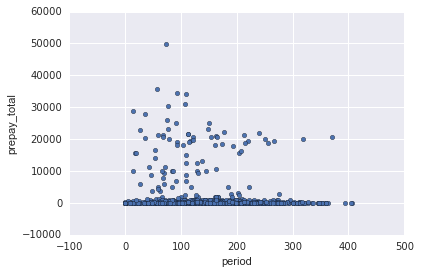

In [78]:
import seaborn as sns
train.plot(kind='scatter',y='prepay_total',x='period')

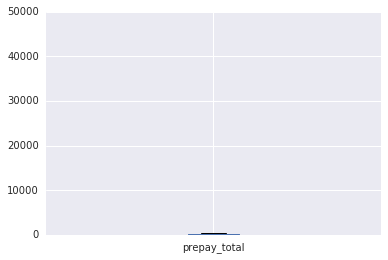

In [79]:
train.plot(kind='box',y='prepay_total',x='period')

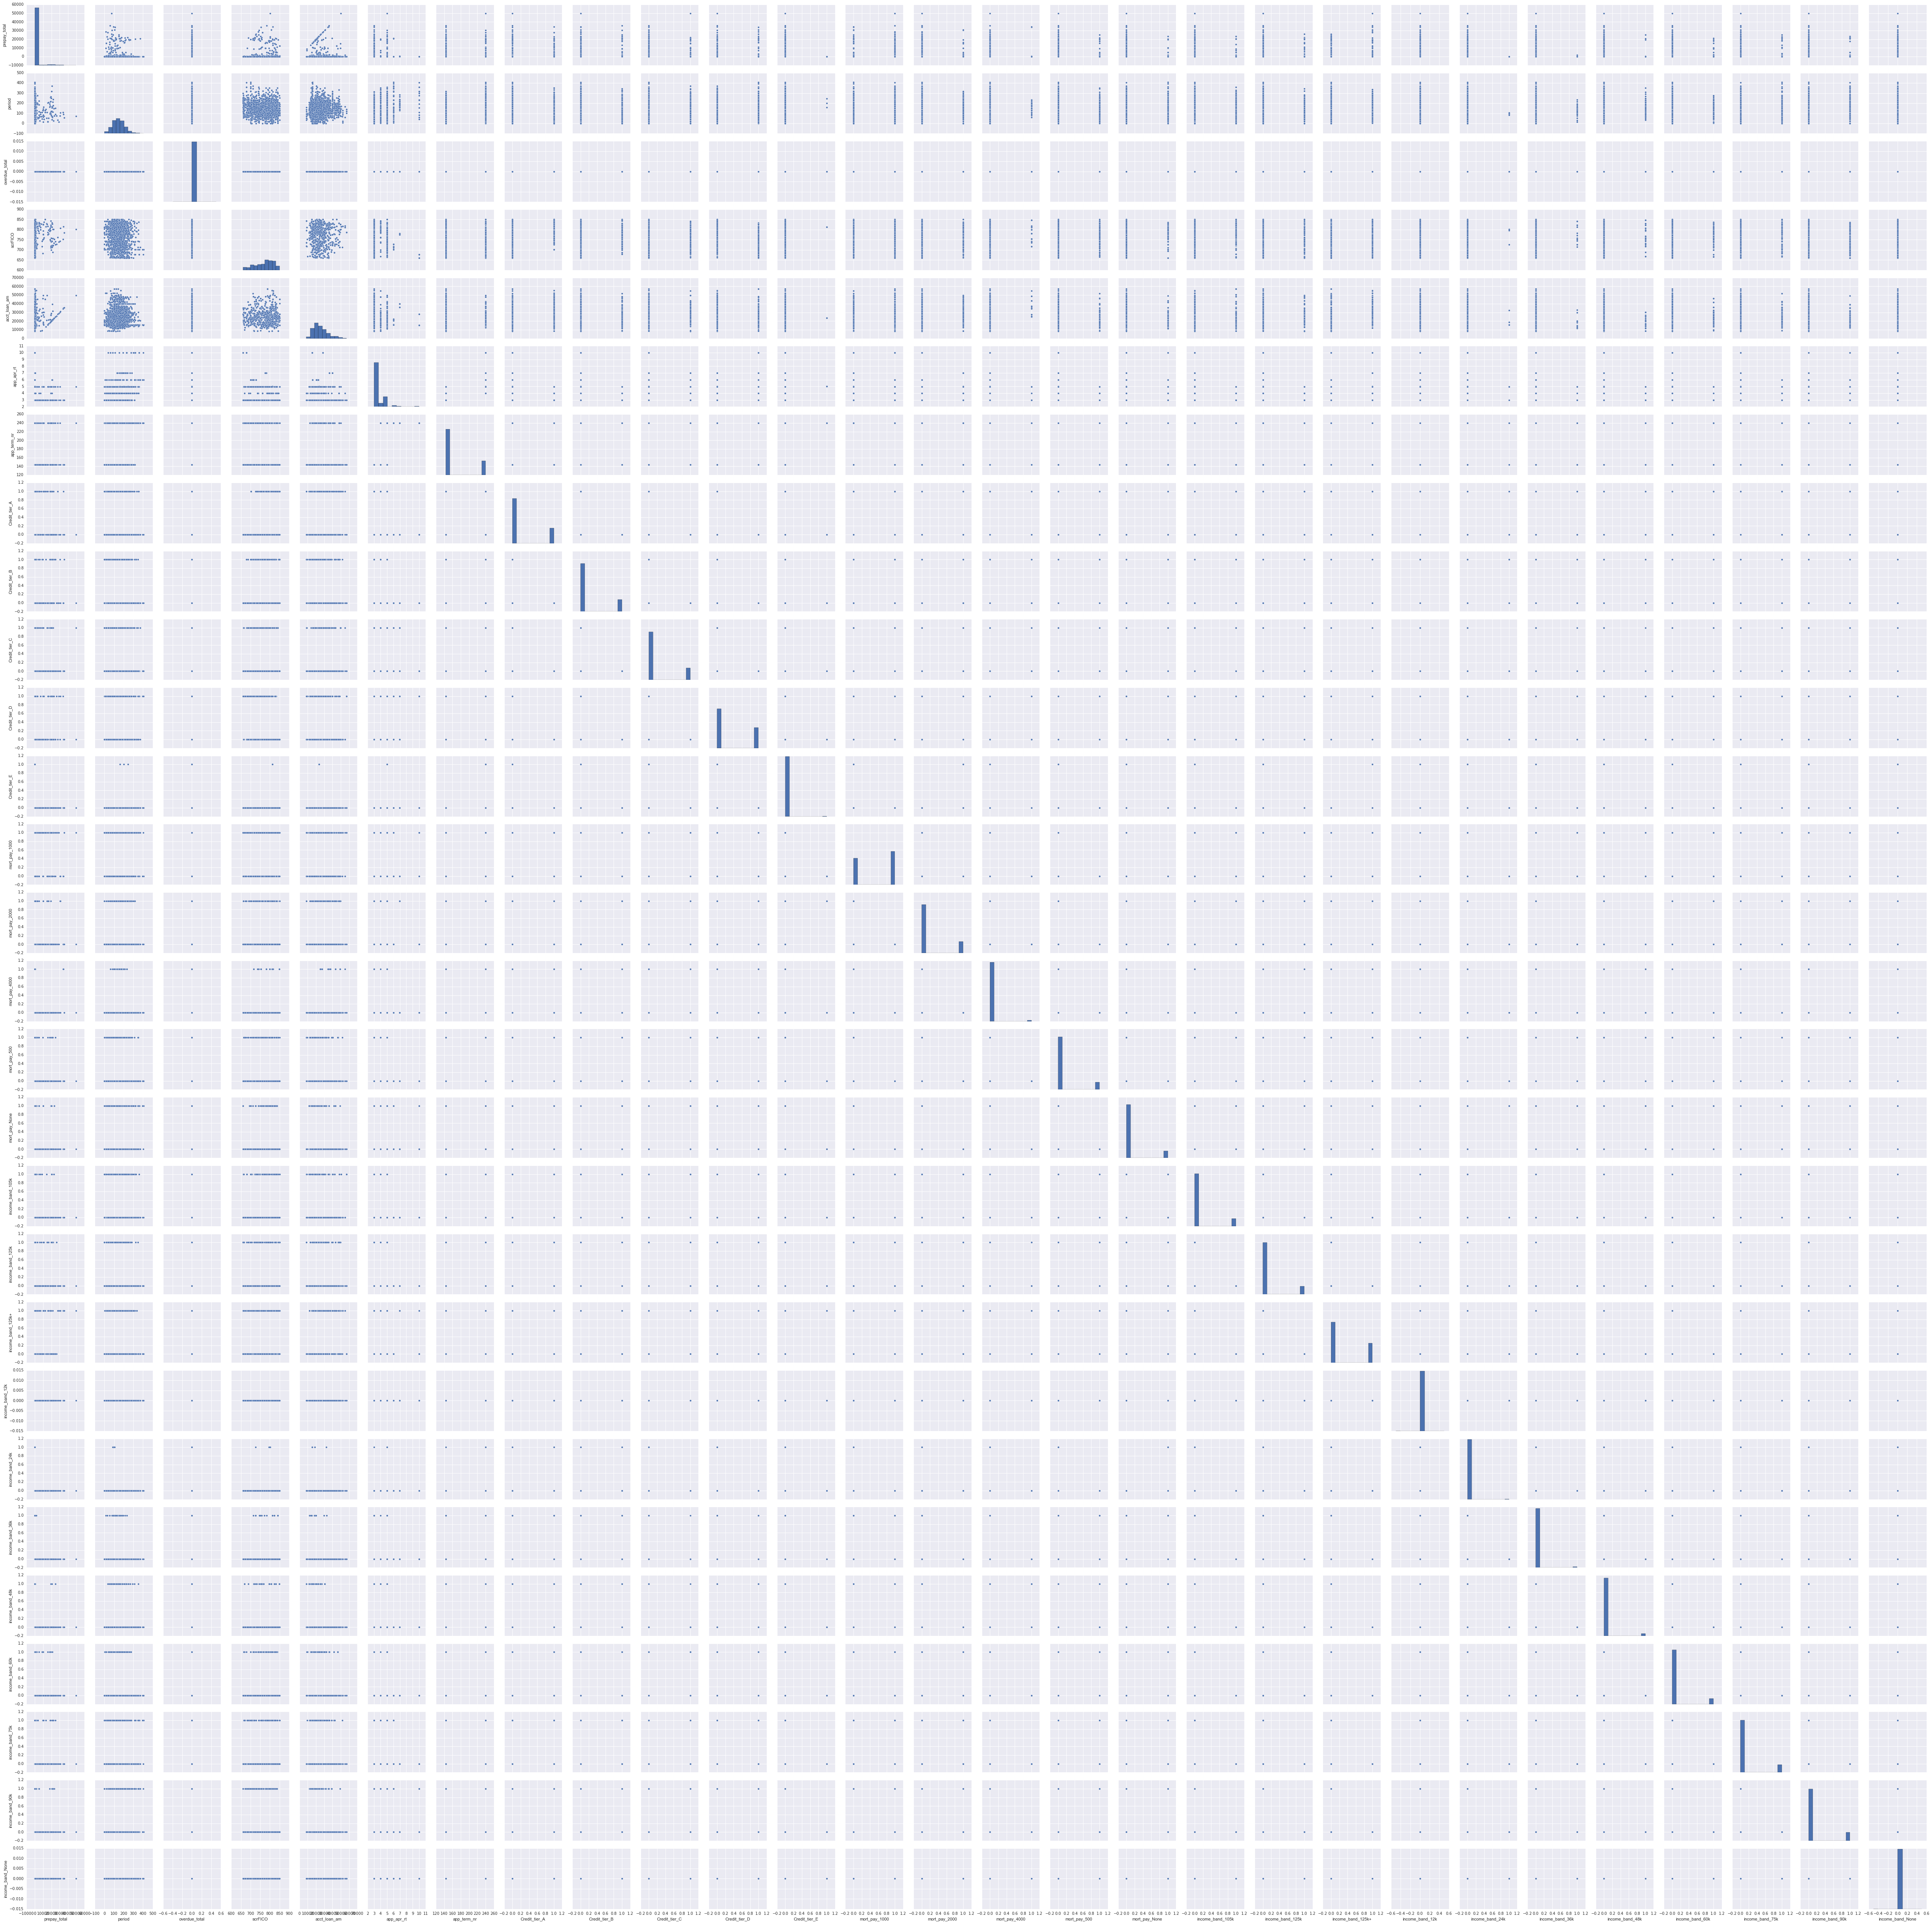

In [80]:
sns.pairplot(train)

In [ ]:
train.corr() 

In [70]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='prepay_total ~ period + overdue_total + scrFICO  + acct_loan_am + app_apr_rt + app_term_nr + Credit_tier_A + Credit_tier_B + Credit_tier_C + Credit_tier_D + Credit_tier_E + mort_pay_1000 + mort_pay_2000 + mort_pay_4000 + mort_pay_500 + mort_pay_None + income_band_105k + income_band_125k + income_band_125k+ + income_band_12k + income_band_24k + income_band_36k + income_band_48k + income_band_60k + income_band_75k + income_band_90k + income_band_None', data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           prepay_total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.705
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           2.64e-05
Time:                        19:12:26   Log-Likelihood:            -1.7170e+06
No. Observations:              237711   AIC:                         3.434e+06
Df Residuals:                  237688   BIC:                         3.434e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -0.6586      9.505     -0.069      0.945       -19.289    17.972
period               0.0448      0.009      4.743      0.000         0.026     0.063
overdue_total        0.0008      0.026      0.029      0.977        -0.051     0.053
scrFICO              0.0120      0.016      0.747      0.455        -0.019     0.043
acct_loan_am        -0.0001    8.1e-05     -1.575      0.115        -0.000  3.12e-05
app_apr_rt          -1.1841      1.211     -0.978      0.328        -3.557     1.189
app_term_nr          0.0204      0.029      0.701      0.483        -0.037     0.077
Credit_tier_A        5.2150      3.519      1.482      0.138        -1.683    12.113
Credit_tier_B        2.9626      2.989      0.991      0.322        -2.896     8.821
Credit_tier_C       -1.9753      2.796     -0.706      0.480        -7.456     3.505
Credit_tier_D       -1.4218      2.596     -0.548      0.584        -6.509     3.665
Credit_tier_E       -5.4391      9.183     -0.592      0.554       -23.437    12.559
mort_pay_1000        0.3972      2.267      0.175      0.861        -4.047     4.841
mort_pay_2000       -3.3107      2.666     -1.242      0.214        -8.536     1.914
mort_pay_4000        5.4714      4.322      1.266      0.206        -2.999    13.942
mort_pay_500        -2.6844      2.524     -1.063      0.288        -7.632     2.263
mort_pay_None       -0.5321      2.736     -0.194      0.846        -5.895     4.831
income_band_105k    -2.4427      2.400     -1.018      0.309        -7.147     2.261
income_band_125k    -2.8020      2.307     -1.215      0.224        -7.323     1.719
income_band_12k   2.737e-16   5.62e-16      0.487      0.626     -8.28e-16  1.38e-15
income_band_24k    -12.2901     11.136     -1.104      0.270       -34.116     9.536
income_band_36k     -9.8475      5.834     -1.688      0.091       -21.282     1.587
income_band_48k     -3.6249      3.746     -0.968      0.333       -10.968     3.718
income_band_60k     -1.6543      2.811     -0.588      0.556        -7.164     3.855
income_band_75k     -2.5727      2.367     -1.087      0.277        -7.212     2.066
income_band_90k     -2.1087      2.300     -0.917      0.359        -6.617     2.399
income_band_None          0          0        nan        nan             0         0
==============================================================================
Omnibus:                   838600.804   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     286923038797.696
Skew:                          70.068   Prob(JB):                         0.00
Kurtosis:                    5383.423   Cond. No.                     7.49e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [ ]:
lm = smf.ols(formula='prepay_total ~ period + overdue_total + scrFICO  + acct_loan_am + app_apr_rt + app_term_nr', data=train).fit()
lm.summary()

In [45]:
data = df3.join(c)
data.dropna().corr()

,prepay_total,loan_amount_calc,prepay_perc,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None
prepay_total,1.000000,0.360651,0.729198,-0.165097,0.366355,0.002845,0.002440,-0.040459,0.045236,-0.035675,0.032220,NaN,-0.025991,0.004240,0.296844,-0.015046,-0.084420,-0.096776,-0.071471,0.196567,NaN,NaN,0.150573,0.089666,-0.184207,-0.094200,0.070714,NaN
loan_amount_calc,0.360651,1.000000,-0.297304,0.063161,0.999738,-0.093069,-0.080936,-0.015373,0.009014,0.022019,-0.011908,NaN,-0.008184,0.136438,0.197261,-0.079559,-0.115913,-0.075428,0.064989,0.352218,NaN,NaN,0.137085,0.006033,-0.159032,-0.208901,-0.153510,NaN
prepay_perc,0.729198,-0.297304,1.000000,-0.279060,-0.293425,0.062351,0.047822,-0.094241,0.061710,-0.029555,0.068598,NaN,-0.010335,-0.075311,0.109547,0.100010,-0.068824,-0.075700,-0.075596,-0.083507,NaN,NaN,0.031132,0.085542,-0.044372,0.044654,0.197728,NaN
scrFICO,-0.165097,0.063161,-0.279060,1.000000,0.062450,-0.245539,-0.217950,0.539106,-0.183898,-0.033560,-0.371706,NaN,-0.036622,0.154466,0.023411,-0.167783,0.076398,0.029066,0.048611,0.085318,NaN,NaN,0.061457,-0.058760,0.067592,-0.036113,-0.205974,NaN
acct_loan_am,0.366355,0.999738,-0.293425,0.062450,1.000000,-0.086943,-0.073365,-0.017626,0.010843,0.026936,-0.015655,NaN,-0.004730,0.134348,0.195012,-0.080487,-0.117190,-0.073485,0.061590,0.354706,NaN,NaN,0.135515,0.004559,-0.161062,-0.210955,-0.149866,NaN
app_apr_rt,0.002845,-0.093069,0.062351,-0.245539,-0.086943,1.000000,0.947403,-0.043793,-0.203810,0.118549,0.134760,NaN,-0.018024,-0.062735,-0.127162,-0.000784,0.138848,0.099763,0.005291,-0.122874,NaN,NaN,0.128596,-0.029326,-0.035693,0.010965,0.072568,NaN
app_term_nr,0.002440,-0.080936,0.047822,-0.217950,-0.073365,0.947403,1.000000,-0.035674,-0.224322,0.123675,0.141022,NaN,-0.002680,-0.018886,-0.124959,-0.031263,0.107856,0.103236,0.009791,-0.065366,NaN,NaN,0.129344,-0.027080,-0.031263,-0.016752,0.009791,NaN
Credit_tier_A,-0.040459,-0.015373,-0.094241,0.539106,-0.017626,-0.043793,-0.035674,1.000000,-0.374295,-0.337817,-0.410408,NaN,-0.028627,-0.218487,0.056339,-0.042558,0.248803,0.005361,-0.134072,-0.058007,NaN,NaN,0.153333,0.002985,0.175963,0.051863,-0.063881,NaN
Credit_tier_B,0.045236,0.009014,0.061710,-0.183898,0.010843,-0.203810,-0.224322,-0.374295,1.000000,-0.261607,-0.317821,NaN,-0.101478,-0.075081,-0.081629,0.206776,0.043193,-0.091293,-0.054906,-0.074906,NaN,NaN,-0.057392,0.197757,0.043193,0.005995,0.102726,NaN
Credit_tier_C,-0.035675,0.022019,-0.029555,-0.033560,0.026936,0.118549,0.123675,-0.337817,-0.261607,1.000000,-0.286847,NaN,0.185386,0.147093,-0.073674,-0.182477,-0.182477,-0.068175,0.142928,-0.021440,NaN,NaN,-0.051798,-0.090755,-0.008782,-0.039102,0.059240,NaN


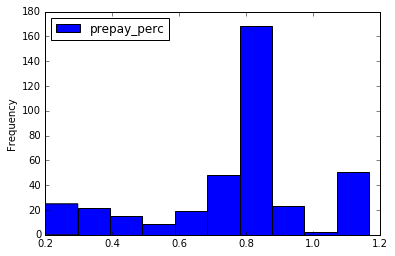

In [44]:
data.plot(kind='hist',use_index=True,y='prepay_perc')

In [48]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='prepay_perc ~ scrFICO  + acct_loan_am + app_apr_rt + app_term_nr', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            prepay_perc   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.861
Date:                Tue, 24 Jan 2017   Prob (F-statistic):            0.00628
Time:                        20:33:02   Log-Likelihood:                -23.662
No. Observations:                  89   AIC:                             57.32
Df Residuals:                      84   BIC:                             69.77
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        2.8695      0.701      4.095      0.000         1.476     4.263
scrFICO         -0.0022      0.001     -2.583      0.012        -0.004    -0.000
acct_loan_am -1.158e-05   4.19e-06     -2.765      0.007     -1.99e-05 -3.25e-06
app_apr_rt       0.0059      0.111      0.053      0.958        -0.215     0.227
app_term_nr     -0.0003      0.002     -0.150      0.881        -0.005     0.004
==============================================================================
Omnibus:                        8.633   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.753
Skew:                          -0.564   Prob(JB):                       0.0342
Kurtosis:                       2.260   Cond. No.                     5.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
lm = smf.ols(formula='prepay_perc ~ scrFICO  + acct_loan_am + app_apr_rt + app_term_nr + Credit_tier_A + Credit_tier_B + Credit_tier_C + Credit_tier_D + Credit_tier_E + mort_pay_1000 + mort_pay_2000 + mort_pay_4000 + mort_pay_500 + mort_pay_None + income_band_105k + income_band_125k + income_band_125k+ + income_band_12k + income_band_24k + income_band_36k + income_band_48k + income_band_60k + income_band_75k + income_band_90k + income_band_None', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            prepay_perc   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.200
Date:                Tue, 24 Jan 2017   Prob (F-statistic):              0.285
Time:                        20:34:56   Log-Likelihood:                -19.204
No. Observations:                  89   AIC:                             76.41
Df Residuals:                      70   BIC:                             123.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            2.0444      0.683      2.993      0.004         0.682     3.407
scrFICO             -0.0022      0.001     -1.867      0.066        -0.005     0.000
acct_loan_am     -1.438e-05   4.95e-06     -2.906      0.005     -2.43e-05 -4.51e-06
app_apr_rt           0.0149      0.121      0.124      0.902        -0.226     0.256
app_term_nr         -0.0002      0.002     -0.094      0.925        -0.005     0.005
Credit_tier_A        0.5482      0.224      2.445      0.017         0.101     0.995
Credit_tier_B        0.5297      0.173      3.068      0.003         0.185     0.874
Credit_tier_C        0.4781      0.190      2.519      0.014         0.100     0.857
Credit_tier_D        0.4884      0.153      3.193      0.002         0.183     0.794
Credit_tier_E     3.054e-16   1.65e-16      1.852      0.068     -2.35e-17  6.34e-16
mort_pay_1000        0.3570      0.146      2.450      0.017         0.066     0.648
mort_pay_2000        0.4039      0.209      1.928      0.058        -0.014     0.822
mort_pay_4000        0.7687      0.246      3.129      0.003         0.279     1.259
mort_pay_500         0.3221      0.176      1.826      0.072        -0.030     0.674
mort_pay_None        0.1926      0.188      1.025      0.309        -0.182     0.568
income_band_105k    -0.0786      0.139     -0.566      0.573        -0.355     0.198
income_band_125k    -0.0339      0.121     -0.281      0.780        -0.275     0.207
income_band_12k   1.532e-17   7.06e-17      0.217      0.829     -1.25e-16  1.56e-16
income_band_24k  -5.791e-18   8.45e-18     -0.685      0.495     -2.26e-17  1.11e-17
income_band_36k      0.4286      0.380      1.129      0.263        -0.328     1.186
income_band_48k      0.1302      0.233      0.559      0.578        -0.334     0.595
income_band_60k      0.0059      0.166      0.036      0.972        -0.325     0.337
income_band_75k     -0.0325      0.132     -0.246      0.806        -0.295     0.230
income_band_90k      0.1086      0.141      0.769      0.445        -0.173     0.390
income_band_None          0          0        nan        nan             0         0
==============================================================================
Omnibus:                        3.304   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.245
Skew:                          -0.422   Prob(JB):                        0.197
Kurtosis:                       2.596   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design

In [216]:
#logit_df.set_index('loan_number',inplace=True)
logit_df
logit_columns = logit_df.join(c)
logit_columns.dropna(inplace=True)
logit_columns['intercept'] = 1
logit_columns.describe()

,prepay_binary,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None,intercept
count,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.00000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.0,2096.000000,2096.000000,2096.000000,2096.000000,2096.00000,2096.000000,2096.0,2096.0
mean,0.042462,757.423187,26504.733779,3.984365,185.038168,0.211355,0.207538,0.24666,0.331584,0.002863,0.537691,0.172710,0.020038,0.166031,0.103531,0.125954,0.135496,0.266698,0.0,0.004294,0.017653,0.048664,0.102576,0.15458,0.144084,0.0,1.0
std,0.201688,50.953007,9138.405141,1.014857,47.503784,0.408367,0.405641,0.43117,0.470895,0.053439,0.498696,0.378087,0.140164,0.372197,0.304723,0.331877,0.342334,0.442339,0.0,0.065403,0.131717,0.215216,0.303477,0.36159,0.351259,0.0,0.0
min,0.000000,642.000000,8186.000000,0.000000,144.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.0
25%,0.000000,715.000000,19661.250000,2.990000,144.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.0
50%,0.000000,762.000000,25157.000000,3.990000,144.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.0
75%,0.000000,800.000000,32063.000000,4.990000,240.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.0
max,1.000000,850.000000,60000.000000,9.990000,240.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,1.0


In [217]:
train2=logit_columns.sample(frac=0.8,random_state=200)
test2=logit_columns.drop(train2.index)
train2.describe()
test2.describe()


,prepay_binary,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None,intercept
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.0
mean,0.042959,756.157518,26344.250597,4.001981,185.241050,0.224344,0.205251,0.233890,0.336516,0.0,0.553699,0.147971,0.011933,0.186158,0.100239,0.128878,0.150358,0.248210,0.0,0.004773,0.023866,0.059666,0.116945,0.138425,0.128878,0.0,1.0
std,0.203008,52.200240,9327.415988,0.991471,47.578559,0.417648,0.404367,0.423809,0.473082,0.0,0.497702,0.355496,0.108715,0.389699,0.300677,0.335466,0.357849,0.432491,0.0,0.069006,0.152815,0.237150,0.321739,0.345758,0.335466,0.0,0.0
min,0.000000,642.000000,8500.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.000000,711.500000,19335.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,0.000000,761.000000,25000.000000,3.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,0.000000,800.500000,31902.500000,4.990000,240.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,850.000000,60000.000000,9.990000,240.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


In [241]:
#train2_cols = train2.columns[1:]
#logit = smf.Logit(train2['prepay_binary'], train2[train2_cols])
#result = logit.fit()


In [204]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          prepay_binary   No. Observations:               237711
Model:                          Logit   Df Residuals:                   237707
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Jan 2017   Pseudo R-squ.:                -0.02198
Time:                        22:33:20   Log-Likelihood:                -686.28
converged:                       True   LL-Null:                       -671.52
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
scrFICO         -0.0073      0.001    -10.130      0.000        -0.009    -0.006
acct_loan_am -6.225e-05   1.51e-05     -4.109      0.000     -9.19e-05 -3.26e-05
app_apr_rt      -0.5200      0.289     -1.799      0.072        -1.086     0.046
app_term_nr      0.0051      0.006      0.798      0.425        -0.007     0.018
================================================================================
"""

In [158]:
params = result.params
np.exp(params)

scrFICO         0.992709
acct_loan_am    0.999938
app_apr_rt      0.594494
app_term_nr     1.005128
dtype: float64

In [238]:
#REMOVING -- CREDIT TIER E, MORT PAY NONE, INCOME BAND NONE
train2_cols = train2[['scrFICO','acct_loan_am', 'app_apr_rt','app_term_nr', 'Credit_tier_A', 'Credit_tier_B', 'Credit_tier_C', 'Credit_tier_D', 'mort_pay_1000','mort_pay_2000', 'mort_pay_4000', 'mort_pay_500','intercept']]
train_2_cols = train2_cols.columns
logit2 = smf.Logit(train2['prepay_binary'],train2[train_2_cols])
result2 = logit2.fit()


         Current function value: 0.165632
         Iterations: 35


C:\Users\jsilverberg\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [239]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          prepay_binary   No. Observations:                 1677
Model:                          Logit   Df Residuals:                     1664
Method:                           MLE   Df Model:                           12
Date:                Tue, 24 Jan 2017   Pseudo R-squ.:                 0.05517
Time:                        23:06:15   Log-Likelihood:                -277.76
converged:                      False   LL-Null:                       -293.98
                                        LLR p-value:                  0.001184
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
scrFICO           0.0064      0.003      2.077      0.038         0.000     0.012
acct_loan_am  -3.356e-05   1.51e-05     -2.221      0.026     -6.32e-05 -3.94e-06
app_apr_rt       -1.0262      0.350     -2.933      0.003        -1.712    -0.341
app_term_nr       0.0214      0.007      2.980      0.003         0.007     0.036
Credit_tier_A    11.3570    290.827      0.039      0.969      -558.654   581.368
Credit_tier_B    11.2199    290.827      0.039      0.969      -558.790   581.230
Credit_tier_C    10.7604    290.827      0.037      0.970      -559.250   580.771
Credit_tier_D    11.2054    290.827      0.039      0.969      -558.805   581.216
mort_pay_1000     0.4015      0.442      0.909      0.363        -0.464     1.267
mort_pay_2000    -0.2770      0.582     -0.476      0.634        -1.418     0.864
mort_pay_4000     0.6327      0.857      0.738      0.460        -1.047     2.313
mort_pay_500      0.0532      0.511      0.104      0.917        -0.948     1.054
intercept       -18.5019    290.834     -0.064      0.949      -588.526   551.522
=================================================================================
"""

In [247]:
test2['admit_pred'] = result2.predict_proba(test2[train_2_cols])

AttributeError: 'LogitResults' object has no attribute 'predict_proba'

,prepay_binary,scrFICO,acct_loan_am,app_apr_rt,app_term_nr,Credit_tier_A,Credit_tier_B,Credit_tier_C,Credit_tier_D,Credit_tier_E,mort_pay_1000,mort_pay_2000,mort_pay_4000,mort_pay_500,mort_pay_None,income_band_105k,income_band_125k,income_band_125k+,income_band_12k,income_band_24k,income_band_36k,income_band_48k,income_band_60k,income_band_75k,income_band_90k,income_band_None,intercept,admit_pred
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.0,419.000000
mean,0.042959,756.157518,26344.250597,4.001981,185.241050,0.224344,0.205251,0.233890,0.336516,0.0,0.553699,0.147971,0.011933,0.186158,0.100239,0.128878,0.150358,0.248210,0.0,0.004773,0.023866,0.059666,0.116945,0.138425,0.128878,0.0,1.0,0.042449
std,0.203008,52.200240,9327.415988,0.991471,47.578559,0.417648,0.404367,0.423809,0.473082,0.0,0.497702,0.355496,0.108715,0.389699,0.300677,0.335466,0.357849,0.432491,0.0,0.069006,0.152815,0.237150,0.321739,0.345758,0.335466,0.0,0.0,0.028337
min,0.000000,642.000000,8500.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000104
25%,0.000000,711.500000,19335.000000,2.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.022008
50%,0.000000,761.000000,25000.000000,3.990000,144.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.035019
75%,0.000000,800.500000,31902.500000,4.990000,240.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.056434
max,1.000000,850.000000,60000.000000,9.990000,240.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.230025


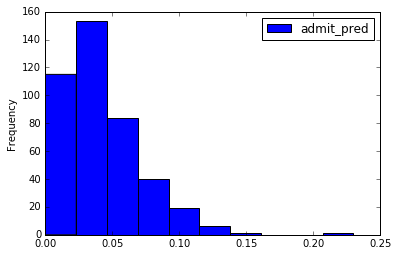

In [245]:
test2.plot(kind='hist',use_index=True,y='admit_pred')
test2.describe()